<a href="https://colab.research.google.com/github/Fawaz441/ML_tensorflow_keras/blob/master/Keras_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.datasets import mnist

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()


In [7]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train = x_train.reshape([-1,784])

In [14]:
x_test = x_test.reshape([-1,784])

In [15]:
x_test.shape

(10000, 784)

In [18]:
x_test,x_train = x_test.astype('float32'),x_train.astype('float32')

In [19]:
x_test,x_train = x_test/255.,x_train/255.

In [20]:
y_test,y_train = keras.utils.to_categorical(y_test,10),keras.utils.to_categorical(y_train,10)

In [21]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

def show(num):
  image = x_train[num].reshape([28,28])
  label = y_train[num].argmax()
  plt.title("Sample {} with label {}".format(num,label))
  plt.imshow(image,cmap=plt.get_cmap('gray_r'))
  plt.show()

In [29]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
from tensorflow.keras.optimizers import Adam

In [32]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
history = model.fit(x_train,y_train,batch_size=250,epochs=10,verbose=2,validation_data=(x_test,y_test))

Epoch 1/10
240/240 - 3s - loss: 0.3431 - accuracy: 0.9028 - val_loss: 0.1679 - val_accuracy: 0.9508
Epoch 2/10
240/240 - 3s - loss: 0.1476 - accuracy: 0.9571 - val_loss: 0.1115 - val_accuracy: 0.9679
Epoch 3/10
240/240 - 3s - loss: 0.1053 - accuracy: 0.9696 - val_loss: 0.0928 - val_accuracy: 0.9709
Epoch 4/10
240/240 - 3s - loss: 0.0791 - accuracy: 0.9770 - val_loss: 0.0803 - val_accuracy: 0.9748
Epoch 5/10
240/240 - 3s - loss: 0.0648 - accuracy: 0.9808 - val_loss: 0.0709 - val_accuracy: 0.9766
Epoch 6/10
240/240 - 3s - loss: 0.0527 - accuracy: 0.9842 - val_loss: 0.0669 - val_accuracy: 0.9775
Epoch 7/10
240/240 - 3s - loss: 0.0433 - accuracy: 0.9876 - val_loss: 0.0626 - val_accuracy: 0.9799
Epoch 8/10
240/240 - 3s - loss: 0.0357 - accuracy: 0.9899 - val_loss: 0.0602 - val_accuracy: 0.9802
Epoch 9/10
240/240 - 3s - loss: 0.0315 - accuracy: 0.9908 - val_loss: 0.0585 - val_accuracy: 0.9813
Epoch 10/10
240/240 - 3s - loss: 0.0265 - accuracy: 0.9927 - val_loss: 0.0604 - val_accuracy: 0.9803

In [35]:
score = model.evaluate(x_test,y_test,verbose=0)

In [36]:
score[0]

0.0603804886341095

In [37]:
score[1]

0.9803000092506409

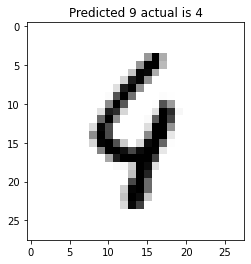

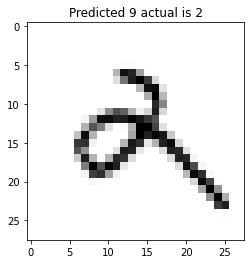

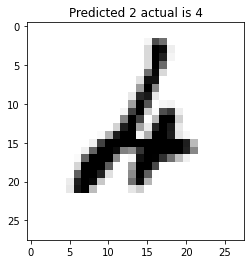

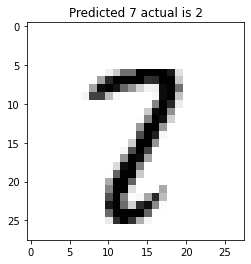

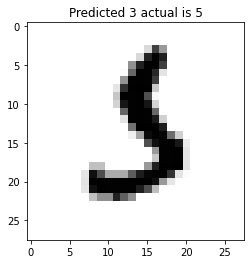

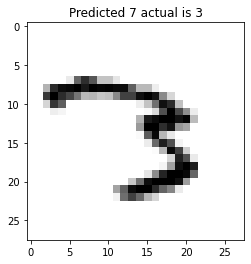

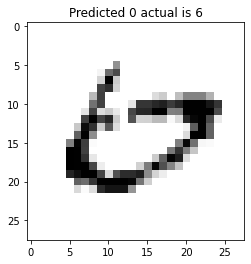

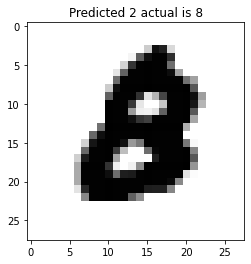

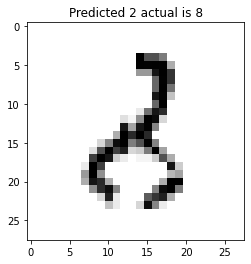

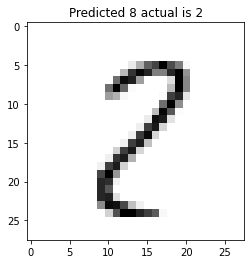

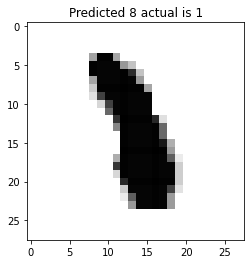

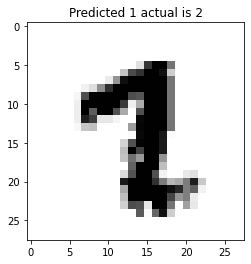

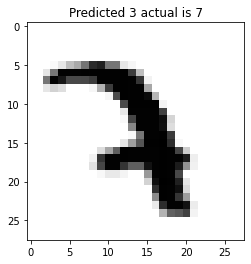

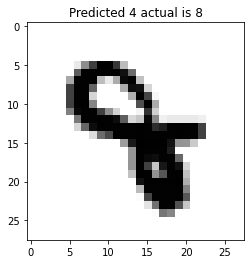

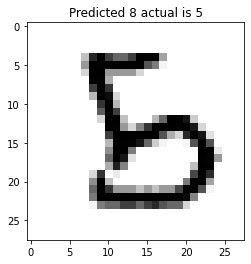

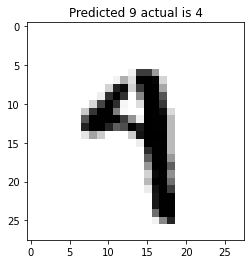

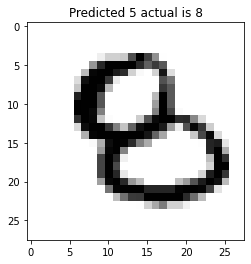

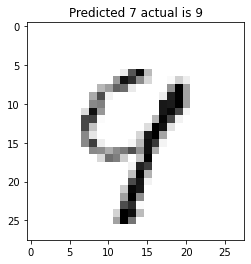

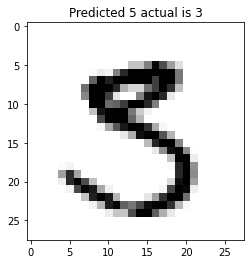

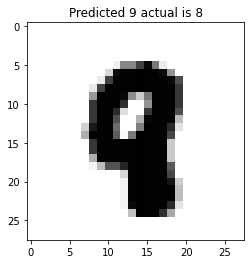

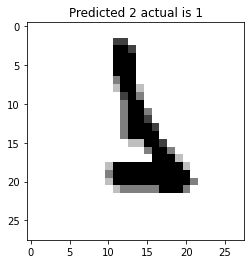

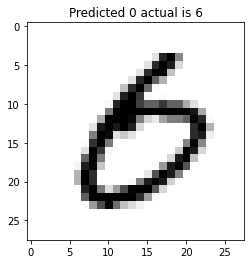

In [43]:
for x in range(1000):
  x_image = x_test[x,:].reshape(1,784)
  predicted = model.predict(x_image).argmax()
  label = y_test[x].argmax()
  if (predicted != label):
    plt.title("Predicted {} actual is {}".format(predicted,label))
    plt.imshow(x_image.reshape([28,28]),cmap=plt.get_cmap('gray_r'))
    plt.show()